# Active Domain Adaptation for Regression

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Superconductivity Data Set

The data set is available on-line, at https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data.
See Hamidieh (2018) for more information.

There are two files:
- `train.csv` that contains 81 features extracted from 21263 superconductors along with the critical temperature in the 82nd column;
- `unique_m.csv` that contains the chemical formula broken up for all the 21263 superconductors from the train.csv file. The last two columns have the critical temperature and chemical formula.

The goal is to predict the critical temperature.

In [2]:
train = pd.read_csv("data/superconduct/train.csv")
train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
unique_m = pd.read_csv("data/superconduct/unique_m.csv")
unique_m

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


## Data Preparation

Accoring to Mathelin et al. (2022) and Pardoe & Stone (2010).

In [4]:
target = "critical_temp"
split = "wtd_std_Valence"
unique_m_constant_columns = tuple(unique_m.columns[unique_m.nunique() <= 1])

X = pd.concat(
    (train.drop([target, split], axis=1),
     unique_m.drop([target, "material", *unique_m_constant_columns], axis=1)),
    axis=1)

y = train[target]

# there are some row's duplicates that we remove
keep_idx = ~X.duplicated()
X = X[keep_idx].values
y = y[keep_idx].values

y = np.expand_dims(y, axis=-1)

X.shape, X.dtype, y.shape, y.dtype

((15309, 157), dtype('float64'), (15309, 1), dtype('float64'))

In [5]:
percentiles = np.percentile(train[split].values, [25, 50, 75])

idx_src = (
    (percentiles[1] < train.loc[keep_idx, split])
    & (train.loc[keep_idx, split] <= percentiles[2])
).values
idx_trg = (percentiles[2] < train.loc[keep_idx, split]).values

X_src, y_src = X[idx_src], y[idx_src]
X_trg, y_trg = X[idx_trg], y[idx_trg]
X_src.shape, y_src.shape, X_trg.shape, y_trg.shape

((3913, 157), (3913, 1), (3834, 157), (3834, 1))

In [6]:
N_FEATURES = X_src.shape[1]
N_FEATURES

157

In [7]:
max_values = X_src[:, 80:].max(axis=0)
X_src[:, 80:] = X_src[:, 80:] / max_values
X_trg[:, 80:] = X_trg[:, 80:] / max_values

X_scaler = StandardScaler()
X_src[:, :80] = X_scaler.fit_transform(X_src[:, :80])
X_trg[:, :80] = X_scaler.transform(X_trg[:, :80])

y_scaler = StandardScaler()
y_src = y_scaler.fit_transform(y_src)
y_trg = y_scaler.transform(y_trg)

Text(0, 0.5, 'count')

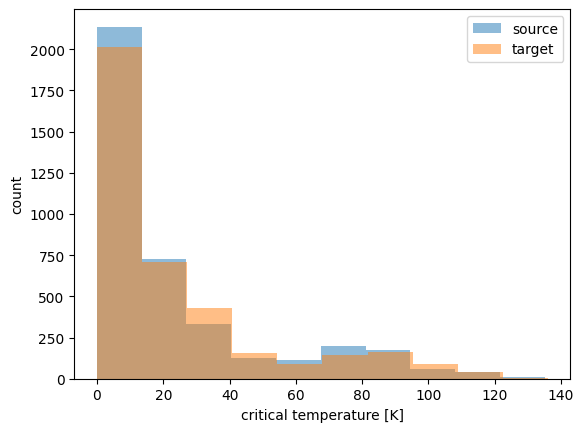

In [8]:
_, ax = plt.subplots()
ax.hist(y_scaler.inverse_transform(y_src), alpha=0.5, label="source")
ax.hist(y_scaler.inverse_transform(y_trg), alpha=0.5, label="target")
ax.legend()
ax.set_xlabel("critical temperature [K]")
ax.set_ylabel("count")

In [9]:
X_src_train, X_src_test, y_src_train, y_src_test = train_test_split(
    X_src, y_src, test_size=0.2, random_state=60)
X_src_train.shape, X_src_test.shape, y_src_train.shape, y_src_test.shape

((3130, 157), (783, 157), (3130, 1), (783, 1))

In [10]:
X_trg_train, X_trg_test, y_trg_train, y_trg_test = train_test_split(
    X_trg, y_trg, test_size=0.2, random_state=96)
X_trg_train.shape, X_trg_test.shape, y_trg_train.shape, y_trg_test.shape

((3067, 157), (767, 157), (3067, 1), (767, 1))

In [11]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset

In [12]:
BS = 2048
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE = torch.device(DEVICE)
MODELPATH = "models/{}.pt"
DEVICE

device(type='cuda')

In [13]:
def convert2tensor(array):
    return torch.from_numpy(array).float().to(DEVICE)

src_train = TensorDataset(convert2tensor(X_src_train), convert2tensor(y_src_train))
src_test = TensorDataset(convert2tensor(X_src_test), convert2tensor(y_src_test))

trg_train = TensorDataset(convert2tensor(X_trg_train), convert2tensor(y_trg_train))
trg_test = TensorDataset(convert2tensor(X_trg_test), convert2tensor(y_trg_test))

In [59]:
class Model(nn.Module):
    def __init__(self, loss_function, n_features):
        super(Model, self).__init__()
        self.loss_function = loss_function
        self.model = nn.Sequential(
            nn.Linear(n_features, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 2))    # mean and variance
        self.to(DEVICE)

    def forward(self, X):
        output = self.model(X)
        mean, var = output[:, :1], output[:, 1:]
        var = F.softplus(var) + 1e-6
        return mean, var

    @torch.no_grad()
    def predict(self, dataset):
        self.eval()
        dataloader = DataLoader(dataset, batch_size=BS)
        output = [self(batch[0]) for batch in dataloader]
        mean, var = list(zip(*output))
        mean, var = torch.concat(mean), torch.concat(var)
        return mean.cpu(), var.cpu()

    def test(self, testset):
        mean_pred, var_pred = self.predict(testset)
        y = torch.concat([batch[-1] for batch in DataLoader(testset, batch_size=BS)]).cpu()
        return torch.mean(torch.abs(y - mean_pred)).item()
    
    def loss(self, y_pred, y):
        return torch.mean(self.loss_function(*y_pred, y))

    def train_epoch(self, trainloader, optimiser):
        self.train()
        for X_batch, y_batch in trainloader:
            optimiser.zero_grad()
            loss = self.loss(self(X_batch), y_batch)
            loss.backward()
            optimiser.step()
        return self

    def train_epochs(self, trainset, testset, hyperparams, modelname):
        optimiser = optim.Adam(self.parameters())
        trainloader = DataLoader(trainset, batch_size=hyperparams["bs"], shuffle=True)
        maes = np.zeros(hyperparams["n_epochs"] + 1)
        maes[0] = self.test(testset)
        print(0, maes[0])
        for epoch in range(1, hyperparams["n_epochs"] + 1):
            self.train_epoch(trainloader, optimiser)
            maes[epoch] = self.test(testset)
            print(epoch, maes[epoch])
        fig, ax = plt.subplots()
        ax.scatter(np.arange(hyperparams["n_epochs"] + 1), maes)
        return self

In [60]:
def square_error(mean_pred, var_pred, mean):
    return torch.square(mean - mean_pred)

def nll(mean_pred, var_pred, mean):
    return torch.log(var_pred) + torch.square(mean - mean_pred) / var_pred

def crps(mean_pred, var_pred, mean):
    std_pred = torch.sqrt(var_pred)
    mean_std = (mean - mean_pred) / std_pred
    pi = torch.tensor(np.pi)
    pdf = (1.0 / torch.sqrt(2.0 * pi)) * torch.exp(-0.5 * torch.square(mean_std))
    cdf = 0.5 + 0.5 * torch.erf(mean_std / torch.sqrt(torch.tensor(2.0)))
    return std_pred * (mean_std * (2.0 * cdf - 1.0) + 2.0 * pdf - 1.0 / torch.sqrt(pi))

In [61]:
HYPERPARAMS = {
    "bs": 128,
    "n_epochs": 100}

0 0.7996490597724915
1 0.46980103850364685
2 0.4355422556400299
3 0.3991764187812805
4 0.40726137161254883
5 0.40793997049331665
6 0.3926742970943451
7 0.3846174478530884
8 0.3879324495792389
9 0.4070858657360077
10 0.3772544264793396
11 0.3765295445919037
12 0.36271747946739197
13 0.38479742407798767
14 0.3646078407764435
15 0.3617109954357147
16 0.3650363087654114
17 0.3880775272846222
18 0.37869346141815186
19 0.3774127662181854
20 0.3769210875034332
21 0.3725172281265259
22 0.35785794258117676
23 0.3756924271583557
24 0.376834511756897
25 0.40017643570899963
26 0.3837112784385681
27 0.375999391078949
28 0.3791722059249878
29 0.3761206269264221
30 0.3879941999912262
31 0.39114806056022644
32 0.4144110381603241
33 0.40013983845710754
34 0.38039925694465637
35 0.39278677105903625
36 0.3856944441795349
37 0.39217090606689453
38 0.38660216331481934
39 0.39438915252685547
40 0.37457817792892456
41 0.3888234794139862
42 0.37796351313591003
43 0.3904823064804077
44 0.3894442915916443
45 0.

0.40322306752204895

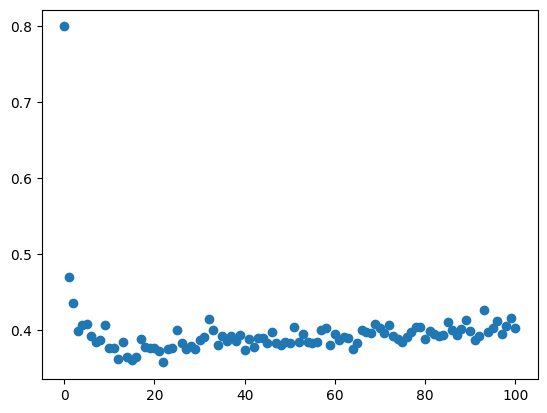

In [64]:
model_src = Model(square_error, N_FEATURES)
model_src.train_epochs(src_train, trg_test, HYPERPARAMS, "source")
model_src.test(trg_test)

0 0.7964021563529968
1 0.37946802377700806
2 0.34904026985168457
3 0.31959590315818787
4 0.2860862612724304
5 0.2676283121109009
6 0.25534787774086
7 0.2502876818180084
8 0.24785824120044708
9 0.252275288105011
10 0.23750923573970795
11 0.2380904257297516
12 0.23403294384479523
13 0.23113656044006348
14 0.23806321620941162
15 0.22588737308979034
16 0.23829270899295807
17 0.22548691928386688
18 0.2243259698152542
19 0.2136458307504654
20 0.23567228019237518
21 0.23425370454788208
22 0.22219640016555786
23 0.21966339647769928
24 0.21257208287715912
25 0.2171630859375
26 0.22278182208538055
27 0.21036486327648163
28 0.20756906270980835
29 0.22292141616344452
30 0.21475817263126373
31 0.20433329045772552
32 0.20149189233779907
33 0.1999489665031433
34 0.2051282525062561
35 0.2080744355916977
36 0.20103991031646729
37 0.19953002035617828
38 0.19995509088039398
39 0.2074889987707138
40 0.2130565047264099
41 0.1921508014202118
42 0.19465085864067078
43 0.2151079773902893
44 0.1926334053277969

0.19491292536258698

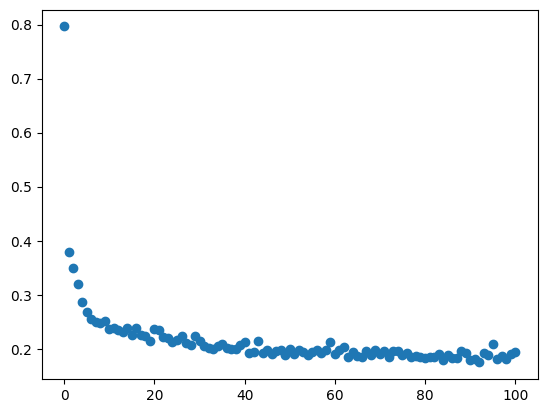

In [63]:
model_trg = Model(nll, N_FEATURES)
model_trg.train_epochs(trg_train, trg_test, HYPERPARAMS, "target")
model_trg.test(trg_test)